In [30]:
import numpy as np
import pandas as pd
import scanpy as sc

In [31]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.3 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1


In [32]:
results_file = '/home/igor-server/courseWork/ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2/testWrite/pbmc3k.h5ad'

In [33]:
adata = sc.read_10x_mtx('/home/igor-server/courseWork/ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2/ExampleData/filtered_gene_bc_matrices/hg19/',
                        var_names='gene_symbols',
                        cache=True)

... reading from cache file cache/home-igor-server-courseWork-ReductionMethodsForComparingUnicellularSequencingExperiments-Coursework2-ExampleData-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [34]:
adata.var_names_make_unique()

In [35]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


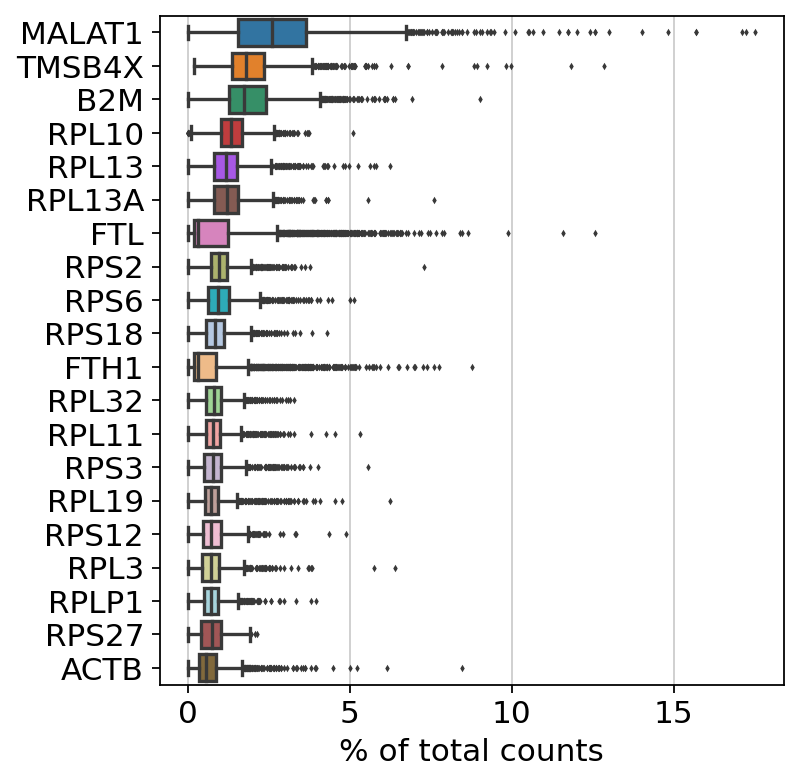

In [36]:
sc.pl.highest_expr_genes(adata, n_top=20, )